In [2]:
## Imports and Auto Reload ##
from models import utils as models_utils
from systems import utils as systems_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
## Pulling the data ##

dataset_a_x, dataset_a_fx = systems_utils.load_function('../data/function_linear.txt') # Load linear data
dataset_b_x, dataset_b_fx = systems_utils.load_function('../data/function_nonlinear.txt') # Load non-linear data

## First Part: Approximating the Function in Dataset (A) With a Linear Function

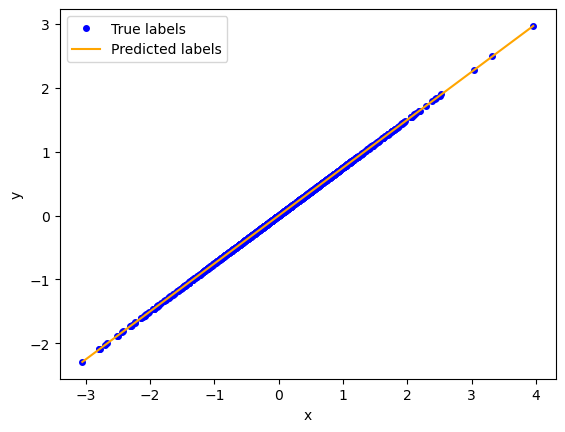

In [4]:
A = models_utils.linear_solve(dataset_a_x, dataset_a_fx, 10e-6) # Fit linear data to a linear function 

# Plot Configurations
fig, ax = plt.subplots() 
systems_utils.plot_function(ax, dataset_a_x, dataset_a_fx, A * dataset_a_x) # Plot A * x, which is the fitted solution, to the original data
ax.legend()
plt.show()

## Second Part: Approximating the Function in Dataset (B) With a Linear Function


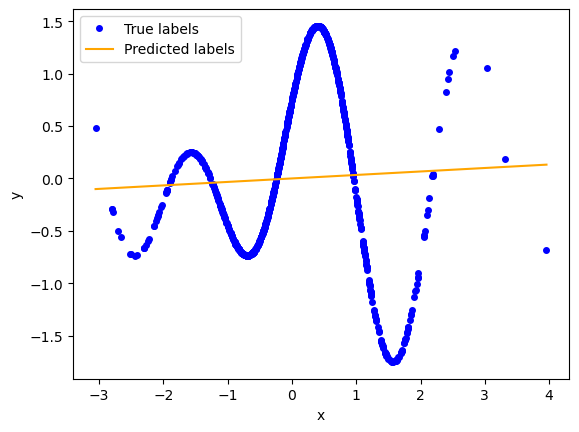

In [5]:
A = models_utils.linear_solve(dataset_b_x, dataset_b_fx, 10e-6) # Fit non-linear data to a linear function

# Plot Configurations
fig, ax = plt.subplots()
systems_utils.plot_function(ax, dataset_b_x, dataset_b_fx, A * dataset_a_x) # Plot A * x, which is the fitted solution, to the original data
ax.legend()
plt.show()

## Third Part: Approximating the Function in Dataset (B) With a Combination of Radial Functions

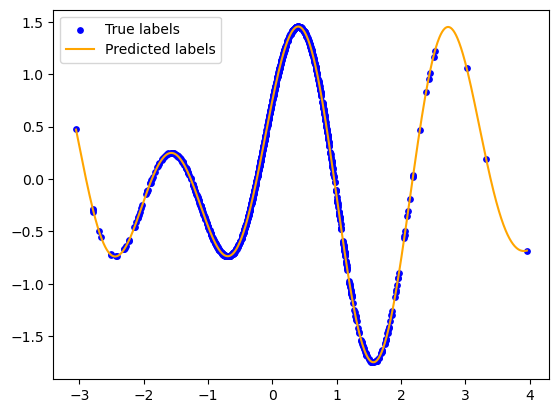

In [ ]:
L = 500 # Choose L
center_ids = np.linspace(0, len(dataset_b_x) - 1, L).astype(int) # Create L many center ids equally spaced in data
centers = dataset_b_x[center_ids] # Get 100 centers using their ids
eps = 1 # Choose eps

phi = models_utils.rbf(dataset_b_x, centers, eps) # Solve rbf using the data, centers and eps
C = models_utils.linear_solve(phi, dataset_b_fx, 10e-6) # Find C

# Generate smooth predictions on a dense x-axis for plotting
x_dense = np.linspace(min(dataset_b_x), max(dataset_b_x), 1000).reshape(-1, 1) # Create 1000 points equally spaced between the minimum and maximum of the data
phi_dense = models_utils.rbf(x_dense, centers, eps) # Solve rbf using the data, centers and eps; this time with dense x values
y_dense = phi_dense @ C # Generate predictions on the dense x values

# Plot Configurations
fig, ax = plt.subplots()
ax.scatter(dataset_b_x, dataset_b_fx, label='True labels', s=15, color='blue') # Plot original x and fx
ax.plot(x_dense, y_dense,  label='Predicted labels', markersize=10, color='orange') # Plot dense x and its predictions
ax.legend()
plt.show()